## Pandas
The Pandas library is built on NumPy and provides easy-to-use data structures and data analysis tools for the Python programming language.


In [1]:
import pandas as pd

In [ ]:
##Asking For Help

In [ ]:
help(pd.Series.loc) 

## Pandas Data Structures

### Series
A one-dimensional labeled array capable of holding any data type

In [ ]:
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])

### DataFrame

In [ ]:
data = {'Country': ['Belgium', 'India', 'Brazil'],
        'Capital': ['Brussels', 'New Delhi', 'Brasília'],
        'Population': [11190846, 1303171035, 207847528]} 

In [ ]:
df = pd.DataFrame(data,columns=['Country', 'Capital', 'Population'])

## I/O

### Read and Write to CSV 

In [ ]:
pd.read_csv('file.csv', header=None, nrows=5) 
df.to_csv('myDataFrame.csv') 

### Read and Write to Excel 

In [ ]:
pd.read_excel('file.xlsx') 
pd.to_excel('dir/myDataFrame.xlsx', sheet_name='Sheet1')

#  Read multiple sheets from the same file 
xlsx = pd.ExcelFile('file.xls') 
df = pd.read_excel(xlsx, 'Sheet1')

### Read and Write to SQL Query or Database Table 

In [ ]:
from sqlalchemy import create_engine 
engine = create_engine('sqlite:///:memory:') 
pd.read_sql("SELECT * FROM my_table;", engine) 
pd.read_sql_table('my_table', engine) 
pd.read_sql_query("SELECT * FROM my_table;", engine)

# read_sql()is a convenience wrapper around read_sql_table() 
# and read_sql_query()

pd.to_sql('myDf', engine)

## Selection

### Getting 

In [ ]:
s['b']                       #Get one element  -5 
df[1:]                       #Get subset of a DataFrame

### Selecting, Boolean Indexing & Setting 

#### By Position

In [ ]:
df.iloc[[0],[0]]                # Select single value by row & column 
df.iat([0],[0])  

#### By Label 

In [ ]:
df.loc[[0], ['Country']]        # Select single value by row & column labels 
df.at([0], ['Country'])          


#### By Label/Position 

In [ ]:
df.ix[2]                         # Select single row of subset of rows
df.ix[:,'Capital']               # Select a single column of subset of columns
df.ix[1, 'Capital']              # Select rows and columns

#### Boolean Indexing 

In [ ]:
s[~(s > 1)]                     # Series s where value is not >1 
s[(s < -1) | (s > 2)]           # s where value is <-1 or >2 
df[df['Population']>1200000000] # Use filter to adjust DataFrame  

#### Setting 

In [ ]:
s['a'] = 6                         # Set index a of Series s to 6

## Dropping 

In [ ]:
s.drop(['a', 'c'])       # Drop values from rows (axis=0) 
df.drop('Country', axis=1) # Drop values from columns(axis=1

## Sort & Rank

In [ ]:
df.sort_index()            # Sort by labels along an axis 
df.sort_values(by='Country') #Sort by the values along an axis 
df.rank()                  # Assign ranks to entries

## Retrieving Series/DataFrame Information

### Basic Information

In [ ]:
df.shape            #(rows,columns)        
df.index            #Describe index  
df.columns          #Describe DataFrame columns 
df.info()           #Info on DataFrame 
df.count()          #Number of non-NA values


### Summary

In [ ]:
df.sum()                # Sum of values      
df.cumsum()             # Cummulative sum of values 
df.min()/df.max()       # Minimum/maximum values 
df.idxmin()/df.idxmax() # Minimum/Maximum index value 
df.describe()           # Summary statistics 
df.mean()               # Mean of values 
df.median()             # Median of values

## Applying Functions 

In [ ]:
f = lambda x: x*2 
df.apply(f)             # Apply function
df.applymap(f)          # Apply function element-wise

## Data Alignment

## Internal Data Alignment
NA values are introduced in the indices that don’t overlap:

In [ ]:
s3 = pd.Series([7, -2, 3], index=['a', 'c', 'd']) 
s + s3

### Arithmetic Operations with Fill Methods
You can also do the internal data alignment yourself 
with the help of the fill methods:

In [ ]:
s.add(s3, fill_value=0)   
s.sub(s3, fill_value=2)
s.div(s3, fill_value=4) 
s.mul(s3, fill_value=3)


## Reshaping Data

### Pivot

In [ ]:
 df3= df2.pivot(index='Date', columns='Type',values='Value') #Spread rows into columns

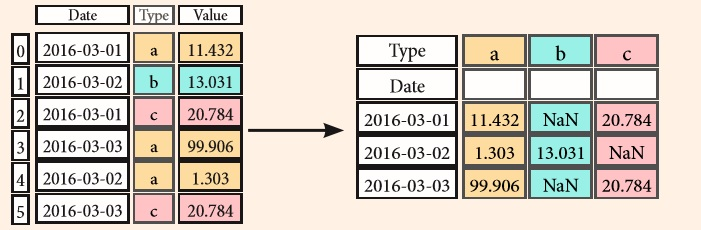

### Pivot Table 

In [ ]:
df4 = pd.pivot_table(df2,values='Value',index='Date',columns='Type']) #Spread rows into columns 

### Stack / Unstack

In [ ]:
stacked = df5.stack()         # Pivot a level of column labels 
stacked.unstack()             # Pivot a level of index labels

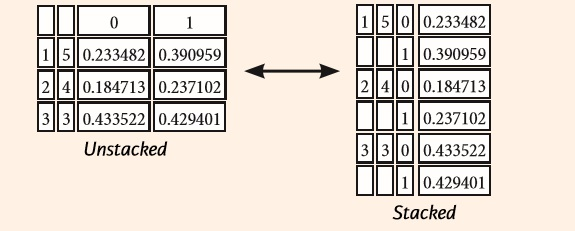

### Melt

In [ ]:
#Gather columns into rows
pd.melt(df2, id_vars=["Date"],value_vars=["Type", "Value"],value_name="Observations")

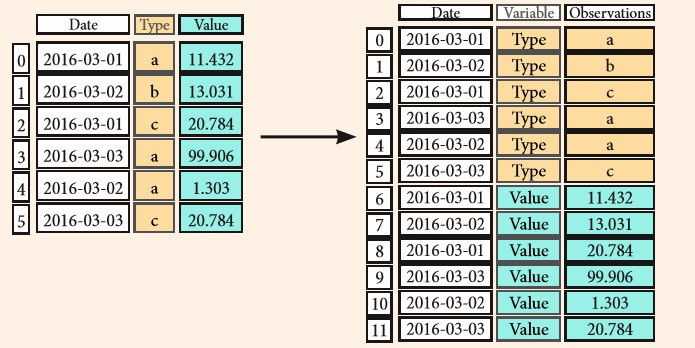

## Iteration

In [ ]:
df.iteritems()              # (Column-index, Series) pairs
df.iterrows()               # (Row-index, Series) pairs

## Advanced Indexing

#### Selecting 

In [ ]:
df3.loc[:,(df3>1).any()]                   # Select cols with any vals >1 
df3.loc[:,(df3>1).all()]                   # Select cols with vals > 1 
df3.loc[:,df3.isnull().any()]              # Select cols with NaN 
df3.loc[:,df3.notnull().all()]             # Select cols without NaN  

#### Indexing With isin 

In [ ]:
df[(df.Country.isin(df2.Type))]            # Find same elements 
df3.filter(items=”a”,”b”])                 # Filter on values 
df.select(lambda x: not x%5)               # Select specific elements  

#### Where

In [ ]:
s.where(s > 0)                             # Subset the data 

#### Query 

In [ ]:
df6.query('second > first')                # Query DataFrame

### Setting/Resetting Index 

In [ ]:
df.set_index('Country')                    # Set the index 
df4 = df.reset_index()                     # Reset the index 
df = df.rename(index=str,columns={"Country":"cntry", 
                                  "Capital":"cptl","Population":"ppltn"}) # Rename DataFrame

### Reindexing 

In [ ]:
s2 = s.reindex(['a','c','d','e','b'])

##### Forward Filling

In [ ]:
df.reindex(range(4),method='ffill')

##### Backward Filling

In [ ]:
s3 = s.reindex(range(5), method='bfill')

### MultiIndexing

In [ ]:
arrays = [np.array([1,2,3]),np.array([5,4,3])] 
df5 = pd.DataFrame(np.random.rand(3, 2), index=arrays) 
tuples = list(zip(*arrays)) 
index = pd.MultiIndex.from_tuples(tuples,names=['first', 'second'])
df6 = pd.DataFrame(np.random.rand(3, 2), index=index) 
df2.set_index(["Date", "Type"]) 

## Duplicate Data 

In [ ]:
s3.unique()                                 # Return unique values 
df2.duplicated('Type')                      # Check duplicates 
df2.drop_duplicates('Type', keep='last')    # Drop duplicates 
df.index.duplicated()                       # Check index duplicates 

## Grouping Data 

#### Aggregation

In [ ]:
df2.groupby(by=['Date','Type']).mean() 
df4.groupby(level=0).sum() 
df4.groupby(level=0).agg({'a':lambda x:sum(x)/len(x),'b': np.sum})

#### Transformation

In [ ]:
customSum = lambda x: (x+x%2) 
df4.groupby(level=0).transform(customSum)

## Missing Data 

In [ ]:
df.dropna()                 # Drop NaN values 
df3.fillna(df3.mean())      # Fill NaN values with a predetermined value 
df2.replace("a", "f")       # Replace values with others

## Combining Data

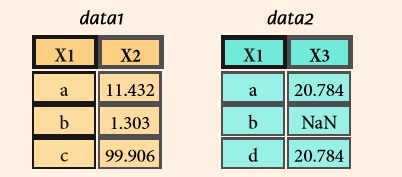

### Merge
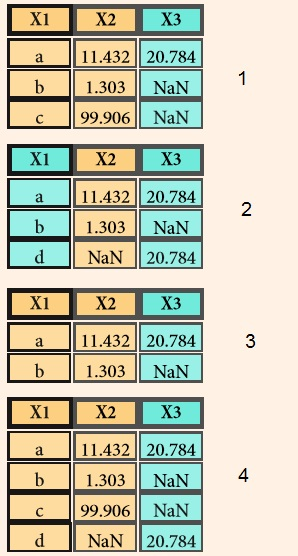

In [ ]:
pd.merge(data1,data2,how='left',on='X1')   # 1
pd.merge(data1,data2,how='right',on='X1')  # 2
pd.merge(data1,data2,how='inner',on='X1')  # 3
pd.merge(data1,data2,how='outer',on='X1')  # 2

### Join

In [ ]:
data1.join(data2, how='right')

### Concatenate

In [ ]:
# VERTICAL
s.append(s2)

# HORIZONTAL
pd.concat([s,s2],axis=1, keys=['One','Two']) 
pd.concat([data1, data2], axis=1, join='inner')

## Dates

In [ ]:
df2['Date']= pd.to_datetime(df2['Date']) 
df2['Date']= pd.date_range('2000-1-1', periods=6, freq='M') 
dates = [datetime(2012,5,1), datetime(2012,5,2)] 
index = pd.DatetimeIndex(dates) 
index = pd.date_range(datetime(2012,2,1), end, freq='BM')

## Visualization

In [6]:
import matplotlib.pyplot as plt 

In [ ]:
s.plot()
plt.show()

In [ ]:
df2.plot()
plt.show()